In [1]:
import numpy as np
from scipy import stats
from scipy import signal
import matplotlib
import matplotlib.pyplot as plt

# Homework 2

### (1) 

There is only a single way to roll snake eyes, so the probability is 1/36. On the other hand, there are six ways to roll a 7 (1+6, 2+5, 3+4, 4+3, 5+2, 6+1) so the probability of rolling a 7 is 6/36 = 1/6. The ratio of these probabilities is 1 to 6.

### (2) 

Analytically, we can see by counting that the number of ways to roll an N with two dice increases linearly from 1 when N = 2 to 6 when N = 7, then decreases linearly again down to 1 when N = 12. There are 36 outcomes in total, so the corresponding probabilities are 1/36, 2/36, 3/36, ... for N = 2, 3, 4, ... etc.

We can get the same answer via discrete convolution. The distribution for a single die is discrete with six equally likely possibilities, so we encode the pmf as a repeated array of 1/6. Convolving this array with itself gives us a new array of 11 elements, which is the pmf for the distribution of the sum of two dice. Note that this pmf runs over values between 2 and 12, since these are the possible results when adding together two six-sided dice.

2.0: 	 0.0278
3.0: 	 0.0556
4.0: 	 0.0833
5.0: 	 0.111
6.0: 	 0.139
7.0: 	 0.167
8.0: 	 0.139
9.0: 	 0.111
10.0: 	 0.0833
11.0: 	 0.0556
12.0: 	 0.0278




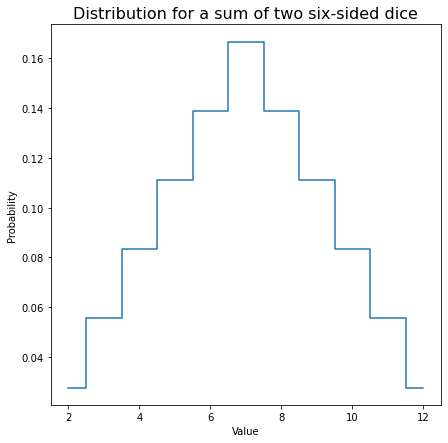

In [2]:
pmf = np.repeat(1/6, 6)
sum_pmf = signal.convolve(pmf, pmf)
sum_vals = np.arange(2, 12.1)
for (n, p) in zip(sum_vals, sum_pmf):
    print(f"{n}: \t {p:.3}")

print("\n")
    
fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.plot(sum_vals, sum_pmf, drawstyle="steps-mid")
ax.set_title("Distribution for a sum of two six-sided dice", fontsize=16)
ax.set_xlabel("Value")
ax.set_ylabel("Probability")
None

### (3) 
The mean of a discrete distribution is the sum of the values weighted by their probabilities, while the variance is the weighted sum of the squared difference between each value and the mean.

In [3]:
mean = np.sum(sum_vals * sum_pmf)
var = np.sum((sum_vals - mean)**2 * sum_pmf)
print(f"Mean: {mean:.4}\nVariance: {var:.4}")

Mean: 7.0
Variance: 5.833


### (4) 
First, we calculate the sum of 10 dice by convolving the same single die pmf from before with itself nine times. This gives us a pmf on integer values from 10 to 60, and to get the average we just divide this range by 10, giving us a distribution on values between 1 and 6 with a step size of 0.1.

We then calculate the mean and variance as before, and plot the distribution against a gaussian with those parameters. (The pdf of the gaussian is divided by 10 to account for the bin size.) While the two distributions appear to agree well on the linear plot, it is clear from the log plot that they have substantially different tails, and hence our distribution is not gaussian.

Mean: 3.5
Variance: 0.2917




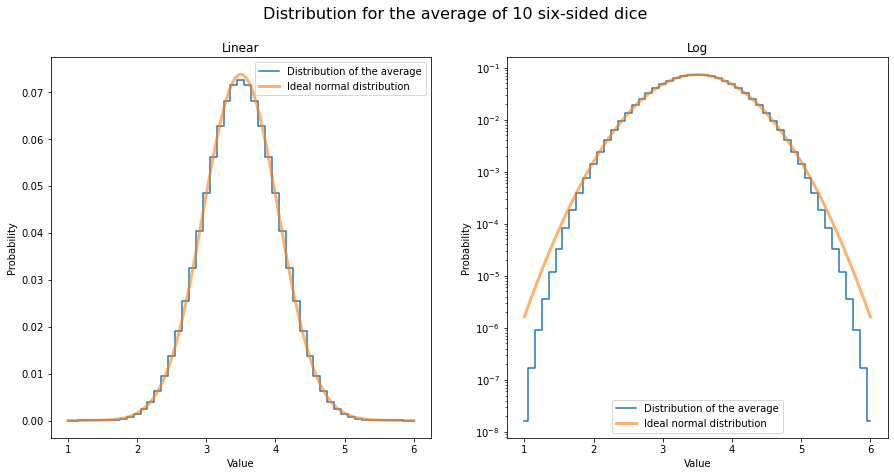

In [4]:
avg_pmf = pmf
for i in range(0, 9):
    avg_pmf = signal.convolve(avg_pmf, pmf)
avg_vals = np.arange(10, 60.1) / 10

mean = np.sum(avg_vals * avg_pmf)
var = np.sum((avg_vals - mean)**2 * avg_pmf)
print(f"Mean: {mean:.4}\nVariance: {var:.4}\n\n")

x = np.linspace(1, 6, 100)

fig, axs = plt.subplots(1,2, figsize=(15,7))
axs[1].set_yscale('log')
for ax in axs:
    ax.plot(avg_vals, avg_pmf, drawstyle="steps-mid")
    ax.plot(x, stats.norm.pdf(x, loc=mean, scale=np.sqrt(var))/10, linewidth=3, alpha=0.6)
    ax.set_xlabel("Value")
    ax.set_ylabel("Probability")
    ax.legend(["Distribution of the average", "Ideal normal distribution"])
axs[0].set_title("Linear")
axs[1].set_title("Log")
fig.suptitle("Distribution for the average of 10 six-sided dice", fontsize=16)
None

### (5)

Below we calculate the distribution arising from the average of two standard normal distributions (i.e. normal distributions with mean 0 and variance 1). This is done by convolving the standard distribution with itself and re-scaling the x axis appropriately. However, SciPy's `convolve` function works only on discrete pmfs, not continuous pdfs, so we have to discretize the gaussian first.

Variance: 0.499


Text(0.5, 1.0, 'Averaged distribution (log)')

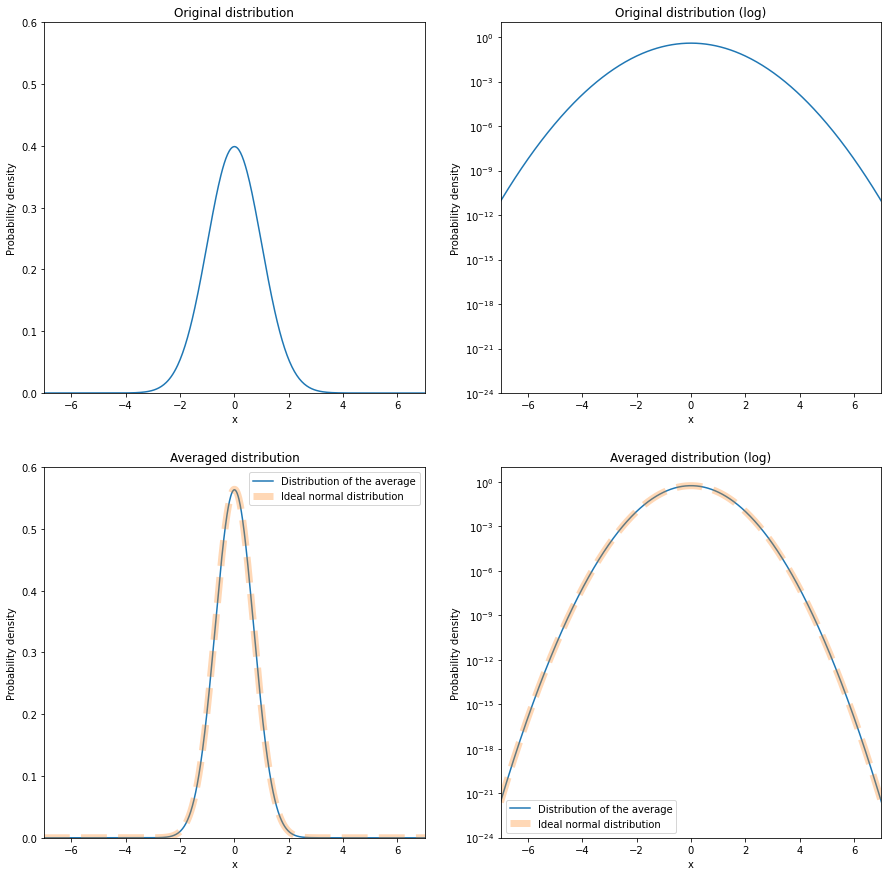

In [6]:
(xmin, xmax) = (-15, 15)

# number of points on the x axis
n = 1000
avg_n = 2*n - 1

# distance between points
delta = (xmax - xmin) / n
avg_delta = (xmax - xmin) / avg_n

x = np.linspace(xmin, xmax, n)
avg_x = np.linspace(xmin, xmax, avg_n)

pdf = stats.norm.pdf(x)
pmf = pdf * delta # convert pdf to pmf for convolution

avg_pmf = signal.convolve(pmf, pmf)
avg_pdf = avg_pmf / avg_delta # convert pmf back to pdf

# calculate the variance of the convolved distribution
var = np.sum(avg_x**2 * avg_pmf)
print(f"Variance: {var:.4}")


fig, axs = plt.subplots(2,2, figsize=(15,15))

# all axes
for ax in axs.flatten():
    ax.set_xlim([-7, 7])
    ax.set_xlabel("x")
    ax.set_ylabel("Probability density")

# linear (left) axes
for ax in axs[:,0]:
    ax.set_ylim([0, 0.6])

# log (right) axes
for ax in axs[:,1]:
    ax.set_yscale('log')
    ax.set_ylim([10e-25, 10])

# original (top) axes
for ax in axs[0,:]:
    ax.plot(x, pdf)

# averaged (bottom) axes
for ax in axs[1,:]:
    ax.plot(avg_x, avg_pdf)
    ax.plot(avg_x, stats.norm.pdf(avg_x, scale=1/np.sqrt(2)), linewidth=7, alpha=0.3, linestyle='dashed')
    ax.legend(["Distribution of the average", "Ideal normal distribution"])
    
axs[0,0].set_title("Original distribution")
axs[0,1].set_title("Original distribution (log)")
axs[1,0].set_title("Averaged distribution")
axs[1,1].set_title("Averaged distribution (log)")


We calculate that the distribution of the average has a variance of $1/2$ (to within floating point errors), and furthermore, plotting a Gaussian with variance $1/2$ over the convolved distribution, we find that they align well in both the linear and log plots. This is suggestive of the general result we know to be true, which is that taking the average of $N$ standard distributions gives another standard distribution with a standard deviation reduced from the original by a factor of $\sqrt{2}$. This means that if a signal has some Gaussian noise, then the noise will remain Gaussian as you integrate over time (which is a kind of averaging) but the "width" of the noise (i.e. its standard deviation) decreases with the squareroot of the time interval over which you integrate. 